In [64]:
import pandas as pd # Data analysis
import numpy as np # Scientific computing
import seaborn as sns # Statistical visualization
import matplotlib.pyplot as plt 

# 读取数据
df = pd.read_csv('/home/yike/phd/dengue/data/dataset_volcano.txt', sep='\t')
df = df.fillna(0)
df = df[df['gene'] != 0]
df['FC'] = [2**float(i) for i in df['logFC']]
result = pd.DataFrame()
result['x'] = df['logFC']
result['y'] = df['P.Value']
result['x2'] = df['FC']
result['-log10(pvalue)']=-df['P.Value'].apply(np.log10)

In [65]:
# 设置pvalue和logFC的阈值
cut_off_pvalue = 0.0000001
cut_off_logFC = 1

In [66]:
#分组为up, normal, down
result.loc[(result.x> cut_off_logFC )&(result.y < cut_off_pvalue),'group'] = 'up'
result.loc[(result.x< -cut_off_logFC )&(result.y < cut_off_pvalue),'group'] = 'down'
result.loc[(result.x>=-cut_off_logFC )&(result.x<=cut_off_logFC )|(result.y >= cut_off_pvalue),'group'] = 'normal'

Text(0.5, 0, 'log2(fold change)')

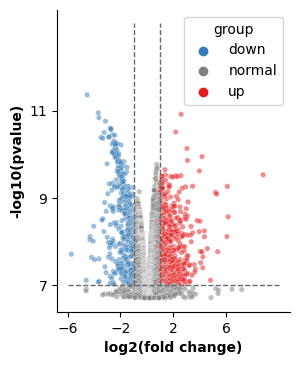

In [74]:
#绘制散点图
fig, ax = plt.subplots(figsize=[3, 4], dpi=100)
ax = sns.scatterplot(x="x", y="-log10(pvalue)",
                      hue='group',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      alpha=0.5,
                      s=15,
                      data=result)

#确定坐标轴显示范围
xmin=-6
xmax=10
ymin=7
ymax=13

ax.spines['right'].set_visible(False) #去掉右边框
ax.spines['top'].set_visible(False) #去掉上边框

ax.vlines(-cut_off_logFC, ymin, ymax, color='dimgrey',linestyle='dashed', linewidth=1) #画竖直线
ax.vlines(cut_off_logFC, ymin, ymax, color='dimgrey',linestyle='dashed', linewidth=1) #画竖直线
ax.hlines(-np.log10(cut_off_pvalue), xmin, xmax, color='dimgrey',linestyle='dashed', linewidth=1) #画竖水平线
ax.set_xticks(range(xmin, xmax, 4))# 设置x轴刻度
ax.set_yticks(range(ymin, ymax, 2))# 设置y轴刻度
ax.set_ylabel('-log10(pvalue)',fontweight='bold') # 设置y轴标签
ax.set_xlabel('log2(fold change)',fontweight='bold') # 设置x轴标签

Text(0.5, 0, 'fold change')

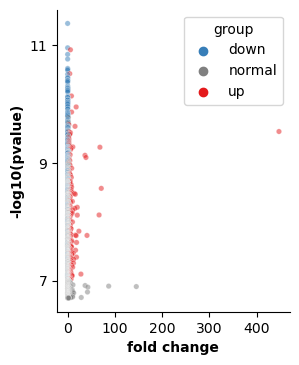

In [75]:
#绘制散点图
fig, ax = plt.subplots(figsize=[3, 4], dpi=100)
ax = sns.scatterplot(x="x2", y="-log10(pvalue)",
                      hue='group',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      alpha=0.5,
                      s=15,
                      data=result)

#确定坐标轴显示范围
xmin=0
xmax=450
ymin=7
ymax=13

ax.spines['right'].set_visible(False) #去掉右边框
ax.spines['top'].set_visible(False) #去掉上边框

#ax.vlines(-cut_off_logFC, ymin, ymax, color='dimgrey',linestyle='dashed', linewidth=1) #画竖直线
#ax.vlines(cut_off_logFC, ymin, ymax, color='dimgrey',linestyle='dashed', linewidth=1) #画竖直线
#ax.hlines(-np.log10(cut_off_pvalue), xmin, xmax, color='dimgrey',linestyle='dashed', linewidth=1) #画竖水平线
ax.set_xticks(range(xmin, xmax, 100))# 设置x轴刻度
ax.set_yticks(range(ymin, ymax, 2))# 设置y轴刻度
ax.set_ylabel('-log10(pvalue)',fontweight='bold') # 设置y轴标签
ax.set_xlabel('fold change',fontweight='bold') # 设置x轴标签

In [70]:
result['x2'].max()

447.22346328862244